In [12]:
import multiprocessing as mp
import time
import numpy as np
import math
matrices_A = [np.random.randint(10,900,(10*i,10*i)) for i in range(15)]
matrices_B = [np.random.randint(10,900,(10*i,10*i)) for i in range(15)]
time_multiply_matrices = []
time_multiply_matrices_parallel = []

def multiply_matrices(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
      for j in range(B.shape[1]):
        for k in range(B.shape[0]):
          # write your code here
          C[i,j] += A[i,k] * B[k,j]
    return C

""" Parallel implementation """

def div(rows, n):
    div_list = []
    num = n
    while num > 0:
        # if the number of rows is larger than the number of processors then divide
        if rows > num:
            x = math.ceil(rows / num)
            div_list.append(int(x))
            rows -= x
            num -= 1
        elif rows == 0:
            div_list.append(0)
            num -= 1
        else:
            div_list.append(1)
            rows -= 1
            num -= 1
    return div_list

def mat_mult_parallel(A, B, index):

  r = B.shape[1]
  for i in range(A.shape[0]):
      for j in range(B.shape[1]):
          sharedMemArr[index*r + i*r + j] = np.sum(A[i,:] * B[:,j])


def run_parallel(A, B, numProcessors, sharedMemArr):
    processes = []
    m = 0
    n = A.shape[0]

    for i in range(numProcessors):
      x = div(A.shape[0], numProcessors)
      A_slice = A[m:m + x[i]]
      p = mp.Process(target=mat_mult_parallel, args=(A_slice, B,m ))
      p.start()
      m += x[i]
      processes.append(p)
    if 1 in x:
        return multiply_matrices_vectorized(A, B)
    for p in processes:
        p.join()

    C = np.reshape(sharedMemArr, (n,B.shape[1]))	
    return C



def multiply_matrices_vectorized(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    # implement here your vectorized solution
    for i in range(A.shape[0]):
      for j in range(B.shape[1]):
        C[i,j] += np.sum(A[i,:] * B[:,j])
    return C



"""Graph"""
def get_multiply_matrices_time(A, B):
  time_start = time.time()
  C = multiply_matrices(A,B)
  time_end = time.time()
  return round(time_end - time_start,3)

def get_multiply_matrices_vectorized_time(A,B):

  time_start = time.time()
  n = A.shape[0]
  C = run_parallel(A,B, 4, sharedMemArr)
  time_end = time.time()
  return round(time_end - time_start,3)

for i in range(15):
  print("Sequential:",get_multiply_matrices_time(matrices_A[i], matrices_B[i]))
  time_multiply_matrices.append(get_multiply_matrices_time(matrices_A[i], matrices_B[i]))
  sharedMemArr = mp.Array("i", matrices_A[i].shape[0]* matrices_B[i].shape[1]) 

  print("Parallel:", get_multiply_matrices_vectorized_time(matrices_A[i], matrices_B[i]))
  time_multiply_matrices_parallel.append(get_multiply_matrices_vectorized_time(matrices_A[i], matrices_B[i]))

Sequential: 0.0
Parallel: 0.025
Sequential: 0.001
Parallel: 0.026
Sequential: 0.007
Parallel: 0.033
Sequential: 0.025
Parallel: 0.035
Sequential: 0.061
Parallel: 0.045
Sequential: 0.115
Parallel: 0.056
Sequential: 0.187
Parallel: 0.073
Sequential: 0.3
Parallel: 0.083
Sequential: 0.466
Parallel: 0.105
Sequential: 0.65
Parallel: 0.144
Sequential: 0.89
Parallel: 0.152
Sequential: 1.182
Parallel: 0.179
Sequential: 1.455
Parallel: 0.215
Sequential: 1.922
Parallel: 0.255
Sequential: 2.475
Parallel: 0.281


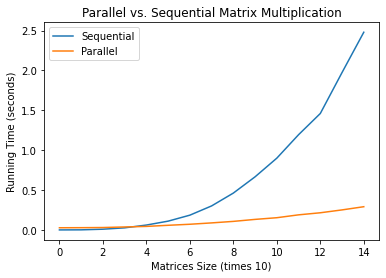

In [13]:
import matplotlib.pyplot as plt

plt.plot(time_multiply_matrices)
plt.plot(time_multiply_matrices_parallel)
plt.xlabel('Matrices Size (times 10)')
plt.ylabel('Running Time (seconds)')
plt.title('Parallel vs. Sequential Matrix Multiplication')
plt.legend(['Sequential', 'Parallel'])